In [43]:
import pandas as pd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import sys
from google.colab import files
from sklearn.cluster import KMeans


Cargar y Preprocesar los Datos

In [20]:
#Cargar el archivo S&P500_prices en el cuaderno
from google.colab import files
datos = files.upload()

Saving S&P500_prices.csv to S&P500_prices (1).csv


In [21]:
df = pd.read_csv('S&P500_prices.csv')
print(df.head(20))

          Date      Close Ticker
0   2024-01-02  91.973244    MMM
1   2024-01-03  90.125420    MMM
2   2024-01-04  90.443146    MMM
3   2024-01-05  90.794312    MMM
4   2024-01-08  91.020065    MMM
5   2024-01-09  91.220734    MMM
6   2024-01-10  90.551842    MMM
7   2024-01-11  91.070236    MMM
8   2024-01-12  90.401337    MMM
9   2024-01-16  90.000000    MMM
10  2024-01-17  88.695648    MMM
11  2024-01-18  88.996658    MMM
12  2024-01-19  90.100334    MMM
13  2024-01-22  90.317726    MMM
14  2024-01-23  80.351173    MMM
15  2024-01-24  77.959869    MMM
16  2024-01-25  80.250839    MMM
17  2024-01-26  80.259193    MMM
18  2024-01-29  80.585281    MMM
19  2024-01-30  80.058525    MMM


In [22]:
#Verificar y limpiar los datos
df_cleaned = df.dropna()
print(df_cleaned)

             Date       Close Ticker
0      2024-01-02   91.973244    MMM
1      2024-01-03   90.125420    MMM
2      2024-01-04   90.443146    MMM
3      2024-01-05   90.794312    MMM
4      2024-01-08   91.020065    MMM
...           ...         ...    ...
29824  2024-03-22  168.899994    ZTS
29825  2024-03-25  167.809998    ZTS
29826  2024-03-26  165.669998    ZTS
29827  2024-03-27  168.509995    ZTS
29828  2024-03-28  169.210007    ZTS

[29829 rows x 3 columns]


In [23]:
df_cleaned['Date'] =  pd.to_datetime(df_cleaned['Date'])
df.sort_values(['Ticker', 'Date'], ascending=[True, True], inplace=True)
df_cleaned

,Date,Close,Ticker
0,2024-01-02,91.973244,MMM
1,2024-01-03,90.125420,MMM
2,2024-01-04,90.443146,MMM
3,2024-01-05,90.794312,MMM
4,2024-01-08,91.020065,MMM
...,...,...,...
29824,2024-03-22,168.899994,ZTS
29825,2024-03-25,167.809998,ZTS
29826,2024-03-26,165.669998,ZTS
29827,2024-03-27,168.509995,ZTS


Cálculo de Retornos Porcentuales Diarios

In [24]:
df_cleaned['Retorno'] = df_cleaned.groupby('Ticker')['Close'].pct_change()*100
df_cleaned

,Date,Close,Ticker,Retorno
0,2024-01-02,91.973244,MMM,NaN
1,2024-01-03,90.125420,MMM,-2.009089
2,2024-01-04,90.443146,MMM,0.352538
3,2024-01-05,90.794312,MMM,0.388272
4,2024-01-08,91.020065,MMM,0.248643
...,...,...,...,...
29824,2024-03-22,168.899994,ZTS,0.344574
29825,2024-03-25,167.809998,ZTS,-0.645350
29826,2024-03-26,165.669998,ZTS,-1.275251
29827,2024-03-27,168.509995,ZTS,1.714249


Cálculo de Indicadores de Volatilidad

In [38]:
df_cleaned_desviacion = df_cleaned.groupby('Ticker')['Retorno'].std()
#df_cleaned_desviacion
df_cleaned_min = df_cleaned.groupby('Ticker')['Retorno'].min()
#df_cleaned_min
df_cleaned_max = df_cleaned.groupby('Ticker')['Retorno'].max()
#df_cleaned_max
df_cleaned_rango = df_cleaned_max - df_cleaned_min
#df_cleaned_rango
dfIV = pd.concat([df_cleaned_desviacion, df_cleaned_rango], axis=1)
dfIV





,Retorno,Retorno
Ticker,,
A,1.574248,8.835029
AAL,2.906129,19.724143
AAP,2.126023,11.464262
AAPL,1.257549,7.342815
ABT,1.136425,5.140149
...,...,...
YUM,0.894847,4.013585
ZBH,1.234307,7.242758
ZBRA,2.635019,17.940971


Clusterización

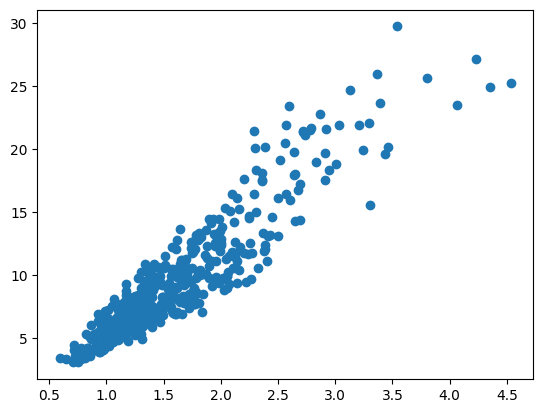

In [42]:
x = df_cleaned_desviacion.to_numpy().tolist()
y = df_cleaned_rango.to_numpy().tolist()

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

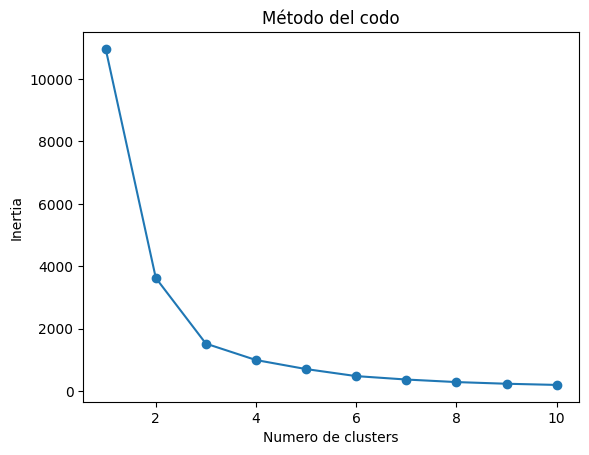

In [46]:
#Determinar el número de clusters
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


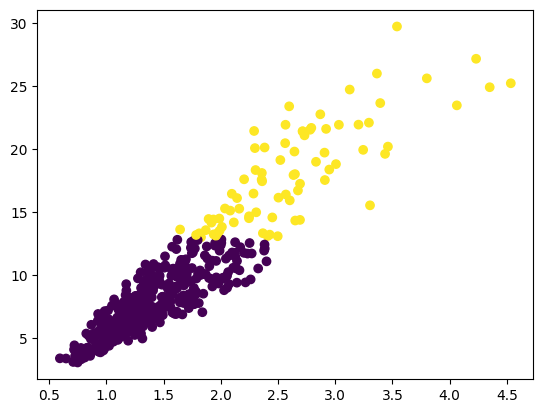

In [47]:
#Machine Learning - K-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()